In [1]:
import numpy as np
import pandas as pd

In [3]:
!ls ./contracts

Contract Name to HTML Link Mapping.csv train
test                                   val


In [4]:
data = pd.read_csv('./contracts/train/contract_60.csv')
data.head()

,xpaths,text,highlighted_xpaths,highlighted_segmented_text,tagged_sequence
0,/html/body/document/type,EX-2.1,NaN,NaN,o
1,/html/body/document/type/sequence,2,NaN,NaN,o
2,/html/body/document/type/sequence/filename,d19211dex21.htm,NaN,NaN,o
3,/html/body/document/type/sequence/filename/des...,EX-2.1,NaN,NaN,o
4,/html/body/document/type/sequence/filename/des...,EX-2.1,NaN,NaN,o


In [17]:
data[~data['highlighted_xpaths'].isna()]

,xpaths,text,highlighted_xpaths,highlighted_segmented_text,tagged_sequence
7,/html/body/document/type/sequence/filename/des...,AGREEMENT AND PLAN OF MERGER,/html/body/document/type/sequence/filename/des...,AGREEMENT AND PLAN OF MERGER,b_t
8,/html/body/document/type/sequence/filename/des...,among,/html/body/document/type/sequence/filename/des...,among,i_t
9,/html/body/document/type/sequence/filename/des...,"FRONT YARD RESIDENTIAL CORPORATION,",/html/body/document/type/sequence/filename/des...,"FRONT YARD RESIDENTIAL CORPORATION,",i_t
10,/html/body/document/type/sequence/filename/des...,"PRETIUM MIDWAY HOLDCO, LP",/html/body/document/type/sequence/filename/des...,"PRETIUM MIDWAY HOLDCO, LP",i_t
11,/html/body/document/type/sequence/filename/des...,AND,/html/body/document/type/sequence/filename/des...,AND,i_t
...,...,...,...,...,...
2906,/html/body/document/type/sequence/filename/des...,Assignment,/html/body/document/type/sequence/filename/des...,Assignment,s_sst
2914,/html/body/document/type/sequence/filename/des...,9.13,/html/body/document/type/sequence/filename/des...,9.13,s_ssn
2915,/html/body/document/type/sequence/filename/des...,Specific Performance,/html/body/document/type/sequence/filename/des...,Specific Performance,s_sst
2918,/html/body/document/type/sequence/filename/des...,84,/html/body/document/type/sequence/filename/des...,84,s_n


In [14]:
len(' '.join(data['xpaths'].values)) + len(' '.join(data['text'].values))

568233

In [13]:
with open('./contract_60.html','r', encoding = 'latin1') as f:
    html_str = f.read()
len(html_str)

529757

In [5]:
help(str.replace)

Help on method_descriptor:

replace(self, old, new, count=-1, /)
    Return a copy with all occurrences of substring old replaced by new.
    
      count
        Maximum number of occurrences to replace.
        -1 (the default value) means replace all occurrences.
    
    If the optional argument count is given, only the first count occurrences are
    replaced.



In [6]:
'Company Stock\xa0 Plans and (D)\xa0siudvbdfe'.replace('\xa0','')

'Company Stock Plans and (D)siudvbdfe'

In [7]:
all_texts = list(data['text'].values)
for i in range(len(all_texts)):
    all_texts[i] = all_texts[i].strip().replace('\xa0','')
full_string = ' '.join(all_texts)
# full_string

In [8]:
np.unique(data['tagged_sequence'])

array(['b_sst', 'b_st', 'b_t', 'e_sst', 'e_st', 'e_t', 'i_sst', 'i_t',
       'o', 's_n', 's_sn', 's_ssn', 's_sssn', 's_ssst', 's_sst', 's_st'],
      dtype=object)

In [8]:
data['highlighted_xpaths'].unique()

array([nan,
       '/html/body/document/type/sequence/filename/description/text/center[1]/div/p[5]',
       '/html/body/document/type/sequence/filename/description/text/center[1]/div/p[6]',
       '/html/body/document/type/sequence/filename/description/text/center[1]/div/p[7]',
       '/html/body/document/type/sequence/filename/description/text/center[1]/div/p[8]',
       '/html/body/document/type/sequence/filename/description/text/center[1]/div/p[9]',
       '/html/body/document/type/sequence/filename/description/text/center[1]/div/p[10]',
       '/html/body/document/type/sequence/filename/description/text/center[2]/div/p[1]',
       '/html/body/document/type/sequence/filename/description/text/center[2]/div/p[4]',
       '/html/body/document/type/sequence/filename/description/text/center[3]/div/p[1]',
       '/html/body/document/type/sequence/filename/description/text/center[3]/div/p[2]',
       '/html/body/document/type/sequence/filename/description/text/center[3]/div/p[6]',
       '

In [18]:
xpath = data['highlighted_xpaths'].unique()[1]

inds = np.asarray([False for i in range(data['xpaths'].shape[0])])

for i in range(data['xpaths'].shape[0]):
#     print(data['xpaths'][i])
    inds[i] = data['xpaths'][i].startswith(xpath)
    
a = data[inds]
a

,xpaths,text,highlighted_xpaths,highlighted_segmented_text,tagged_sequence
7,/html/body/document/type/sequence/filename/des...,AGREEMENT AND PLAN OF MERGER,/html/body/document/type/sequence/filename/des...,AGREEMENT AND PLAN OF MERGER,b_t


In [19]:
# data[(data['tagged_sequence'] == 's_ssn')]# + (data['tagged_sequence'] == 'e_sst')]

In [29]:
qas

[{'question': 'Highlight the parts of the text if any related to "Absence of Litigation Closing Condition" that should be reviewed by a lawyer.',
  'is_impossible': True,
  'answers': [],
  'id': 'contract_60_Absence of Litigation Closing Condition'},
 {'question': 'Highlight the parts of the text if any related to "Accuracy of Target R&W Closing Condition" that should be reviewed by a lawyer.',
  'is_impossible': False,
  'answers': [{'text': 'representation and warranty speaks as of a particular date, in which case such representation and warranty shall be true and correct, subject only to de minimis inaccuracies, as of such earlier date), (ii) the representation and warranty of the Company set forth in Section 5.1(f)(i) (Absence of Certain Changes) and Section 5.1(r) (Asset Management Agreement) shall be true and correct in all respects at the date hereof and the Closing, (iii) the representations and warranties of the Company set forth in the second and third sentence of Section 5.

In [2]:
import json

json_file_path = 'maud_squad_train.json'

with open(json_file_path, 'r') as json_file:
    # Load and parse the JSON data
    data = json.load(json_file)


data = data['data'][0]
title = data['title']
qna = data['paragraphs'][0]
# print(data)
qas, context = qna['qas'], qna['context']


# Using FuzzyWuzzy for finding index of answer

In [8]:
!pip install fuzzywuzzy

In [11]:
from fuzzywuzzy import fuzz

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [47]:
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv('./contracts/train/contract_60.csv')
data.head()

,xpaths,text,highlighted_xpaths,highlighted_segmented_text,tagged_sequence
0,/html/body/document/type,EX-2.1,NaN,NaN,o
1,/html/body/document/type/sequence,2,NaN,NaN,o
2,/html/body/document/type/sequence/filename,d19211dex21.htm,NaN,NaN,o
3,/html/body/document/type/sequence/filename/des...,EX-2.1,NaN,NaN,o
4,/html/body/document/type/sequence/filename/des...,EX-2.1,NaN,NaN,o


In [44]:
context = ' '.join(data['text'])
context

'EX-2.1 2 d19211dex21.htm EX-2.1 EX-2.1 Exhibit 2.1 Execution Version AGREEMENT AND PLAN OF MERGER among FRONT YARD RESIDENTIAL CORPORATION, PRETIUM MIDWAY HOLDCO, LP AND MIDWAY ACQUISITIONCO REIT Dated as of October 19, 2020 TABLE OF CONTENTS Page ARTICLE I THE MERGER; CLOSING; EFFECTIVE TIME 2 1.1 The Merger 2 1.2 Closing 2 1.3 Effective Time 2 ARTICLE II ORGANIZATIONAL DOCUMENTS OF THE SURVIVING COMPANY 2 2.1 The Declaration of Trust of the Surviving Company 2 2.2 The Bylaws of the Surviving Company 2 ARTICLE III MANAGEMENT OF THE SURVIVING COMPANY 3 3.1 Management of Surviving Company 3 ARTICLE IV EFFECT OF THE MERGER ON SECURITIES; EXCHANGE 3 4.1 Effect on Capital Stock 3 4.2 Exchange of Certificates 4 4.3 No Dissenters’ or Appraisal Rights 6 4.4 Adjustments to Prevent Dilution 6 4.5 Treatment of Equity Awards 6 ARTICLE V REPRESENTATIONS AND WARRANTIES 8 5.1 Representations and Warranties of the Company 8 5.2 Representations and Warranties of Parent and Merger Sub 36 ARTICLE VI CO

In [45]:
answer = qas[2]['answers'][0]['text']
answer

'(g) Exception to Change in Recommendation (Intervening Event). Notwithstanding anything to the contrary set forth in Section 6.2(e), upon the occurrence of any Intervening Event, the Company’s board of directors may, at any time prior to the time the Requisite Company Vote is obtained, make a Change in Recommendation if all of the following conditions are met: (i) the Company shall have (A) provided to Parent four (4) Business Days’ prior written notice, which shall (I) set forth in reasonable detail information describing the Intervening Event and the rationale for the Change in Recommendation and (II) state expressly that, subject to clause (ii) below, the Company’s board of directors has determined to make a Change in Recommendation and (B) prior to making such a Change in Recommendation, used commercially reasonable efforts to engage in good faith with Parent (to the extent Parent'

In [46]:
start = 0
window = len(answer) + 10
frs = []

for start in range(0,len(context)-window+1, len(answer)//4):
    context_string = context[start:start+window]
    frs.append(fuzz.partial_ratio(context_string, answer))

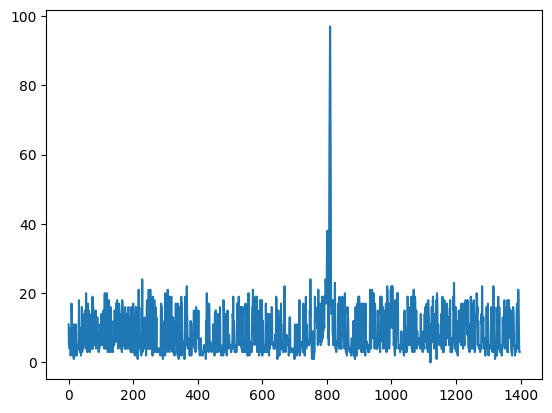

In [48]:
plt.plot(frs)

In [49]:
t1 = time.time()

context_window = context[132:132+ len(answer) + 50]
print(f'Similarity Ratio: {fuzz.partial_ratio(answer, context_window)}%')

print(f'Time: {time.time() - t1}')

Similarity Ratio: 5%
Time: 0.03399515151977539


In [51]:
import time
from tqdm import tqdm

t1 = time.time()
start = 0
window = len(answer) + 50
frs = []

best_ratio = 0
best_window_start = 0
best_window = ''

for start in tqdm(range(0,len(context)-window+1, len(answer)//10)):
    context_string = context[start:start+window]
    frs.append(fuzz.partial_ratio(context_string, answer))
    fuzzy_ratio = fuzz.partial_ratio(context_string, answer)
    
    if fuzzy_ratio > best_ratio:
        best_ratio = fuzzy_ratio
        best_window = context_string
        best_window_start = start

t2 = time.time()

print(f'total time: {t2-t1}')

100%|███████████████████████████████████████| 3518/3518 [01:15<00:00, 46.35it/s]

total time: 75.91309714317322


In [40]:
print(f'best window:\n\n{best_window}\n\nModel Answer:\n\n{answer}')

best window:

tion 8.3(b) ). (g) Exception to Change in Recommendation (Intervening Event) . Notwithstanding anything to the contrary set forth in Section 6.2(e) , upon the occurrence of any Intervening Event, the Company’s board of directors may, at any time prior to the time the Requisite Company Vote is obtained, make a Change in Recommendation if all of the following conditions are met: (i) the Company shall have (A) provided to Parent four (4) Business Days’ prior written notice, which shall (I) set forth in reasonable detail information describing the Intervening Event and the rationale for the Change in Recommendation and (II) state expressly that, subject to clause (ii) below, the Company’s board of directors has determined to make a Change in Recommendation and (B) prior to making such a Change in Recommendation, used commercially reasonable efforts to engage in good faith with Parent (to the extent Parent 49 wishes to engage) during such

Model Answer:

(g) Exception to Chang

# Using Binary Search to find the best_window

In [99]:
l = np.random.randint(0,10, (10))

l = sorted(l)
print(l)

[0, 1, 3, 3, 4, 5, 7, 7, 7, 8]


In [100]:
start = 0
end = 10
mid = (start+end)//2
print(f'Left: {l[start:mid]}\n\n\nRight:{l[mid:end]}')


Left: [0, 1, 3, 3, 4]


Right:[5, 7, 7, 7, 8]


In [107]:
def binary_search_fuzzy(context, answer):
    start = 0
    end = len(context)
    
    thres = 90
    
    left_ratios = []
    right_ratios = []
    
    while (end - start > 4*len(answer)):
        mid = (start+end)//2
#         print(start,mid,end)
        left = context[start:mid]
        right = context[mid:end]
        
        left_ratio = fuzz.partial_ratio(left, answer)
        right_ratio = fuzz.partial_ratio(right, answer)
        
        left_ratios.append(left_ratio)
        right_ratios.append(right_ratio)
        
        # If we found the window
        if left_ratio - right_ratio > thres:
            return (left_ratios, right_ratios, start, left)
        
        elif right_ratio - left_ratio > thres:
            return (left_ratios, right_ratios, mid, right)
        
        # Left half vs Right half
        if left_ratio > right_ratio:
            end = mid + len(answer)//2 + 10
        else:
            start = mid - len(answer)//2 - 10
    return (left_ratios, right_ratios, start, context[start:end])
  

In [108]:
t1 = time.time()
lrs, rrs, start, window = binary_search_fuzzy(context, answer)
print(time.time()-t1)
print(window, '\n\n\n', answer)

0.43529391288757324
 such Change in Recommendation would be inconsistent with the directors’ duties under applicable Law. Notwithstanding anything to the contrary contained herein, neither the Company nor any of its Subsidiaries shall enter into an Alternative Acquisition Agreement before this Agreement has been validly terminated in accordance with its terms (including payment of any applicable Company Termination Fee and the Parent Expenses to the extent due and payable pursuant to Section 8.3(b) ). (g) Exception to Change in Recommendation (Intervening Event) . Notwithstanding anything to the contrary set forth in Section 6.2(e) , upon the occurrence of any Intervening Event, the Company’s board of directors may, at any time prior to the time the Requisite Company Vote is obtained, make a Change in Recommendation if all of the following conditions are met: (i) the Company shall have (A) provided to Parent four (4) Business Days’ prior written notice, which shall (I) set forth in rea

In [103]:
window.find(answer)

-1

In [112]:
answer_words

['(g)',
 'Exception',
 'to',
 'Change',
 'in',
 'Recommendation',
 '(Intervening',
 'Event).',
 'Notwithstanding',
 'anything',
 'to',
 'the',
 'contrary',
 'set',
 'forth',
 'in',
 'Section',
 '6.2(e),',
 'upon',
 'the',
 'occurrence',
 'of',
 'any',
 'Intervening',
 'Event,',
 'the',
 'Company’s',
 'board',
 'of',
 'directors',
 'may,',
 'at',
 'any',
 'time',
 'prior',
 'to',
 'the',
 'time',
 'the',
 'Requisite',
 'Company',
 'Vote',
 'is',
 'obtained,',
 'make',
 'a',
 'Change',
 'in',
 'Recommendation',
 'if',
 'all',
 'of',
 'the',
 'following',
 'conditions',
 'are',
 'met:',
 '(i)',
 'the',
 'Company',
 'shall',
 'have',
 '(A)',
 'provided',
 'to',
 'Parent',
 'four',
 '(4)',
 'Business',
 'Days’',
 'prior',
 'written',
 'notice,',
 'which',
 'shall',
 '(I)',
 'set',
 'forth',
 'in',
 'reasonable',
 'detail',
 'information',
 'describing',
 'the',
 'Intervening',
 'Event',
 'and',
 'the',
 'rationale',
 'for',
 'the',
 'Change',
 'in',
 'Recommendation',
 'and',
 '(II)',
 'sta

In [141]:
def cut_window(window, answer):
    thres = 95
    answer_words = answer.split()
    for i in range(len(answer_words)):
        word = answer_words[i]
        ind = window.find(word)
        if ind != -1:
            start = ind
#             print(ind)
            for j in range(i):
                start -= len(answer_words[j]) + 1
#                 return start
            if fuzz.partial_ratio(answer, window[start:start + len(answer)]) > thres:
                return (start, start + len(answer))


In [142]:
window

' such Change in Recommendation would be inconsistent with the directors’ duties under applicable Law. Notwithstanding anything to the contrary contained herein, neither the Company nor any of its Subsidiaries shall enter into an Alternative Acquisition Agreement before this Agreement has been validly terminated in accordance with its terms (including payment of any applicable Company Termination Fee and the Parent Expenses to the extent due and payable pursuant to Section 8.3(b) ). (g) Exception to Change in Recommendation (Intervening Event) . Notwithstanding anything to the contrary set forth in Section 6.2(e) , upon the occurrence of any Intervening Event, the Company’s board of directors may, at any time prior to the time the Requisite Company Vote is obtained, make a Change in Recommendation if all of the following conditions are met: (i) the Company shall have (A)\xa0provided to Parent four (4)\xa0Business Days’ prior written notice, which shall (I)\xa0set forth in reasonable de

In [143]:
answer

'(g) Exception to Change in Recommendation (Intervening Event). Notwithstanding anything to the contrary set forth in Section 6.2(e), upon the occurrence of any Intervening Event, the Company’s board of directors may, at any time prior to the time the Requisite Company Vote is obtained, make a Change in Recommendation if all of the following conditions are met: (i) the Company shall have (A) provided to Parent four (4) Business Days’ prior written notice, which shall (I) set forth in reasonable detail information describing the Intervening Event and the rationale for the Change in Recommendation and (II) state expressly that, subject to clause (ii) below, the Company’s board of directors has determined to make a Change in Recommendation and (B) prior to making such a Change in Recommendation, used commercially reasonable efforts to engage in good faith with Parent (to the extent Parent'

In [145]:
start, end = cut_window(window, answer) 
# end = -cut_window(window[::-1], answer[::-1]) + 1
window_subsection = window[start:end + 10] # Adding 10 for now to create a buffer

window_subsection

'(g) Exception to Change in Recommendation (Intervening Event) . Notwithstanding anything to the contrary set forth in Section 6.2(e) , upon the occurrence of any Intervening Event, the Company’s board of directors may, at any time prior to the time the Requisite Company Vote is obtained, make a Change in Recommendation if all of the following conditions are met: (i) the Company shall have (A)\xa0provided to Parent four (4)\xa0Business Days’ prior written notice, which shall (I)\xa0set forth in reasonable detail information describing the Intervening Event and the rationale for the Change in Recommendation and (II)\xa0state expressly that, subject to clause (ii)\xa0below, the Company’s board of directors has determined to make a Change in Recommendation and (B)\xa0prior to making such a Change in Recommendation, used commercially reasonable efforts to engage in good faith with Parent (to the extent Parent 49 wish'

In [146]:
context.find(window_subsection)

181486

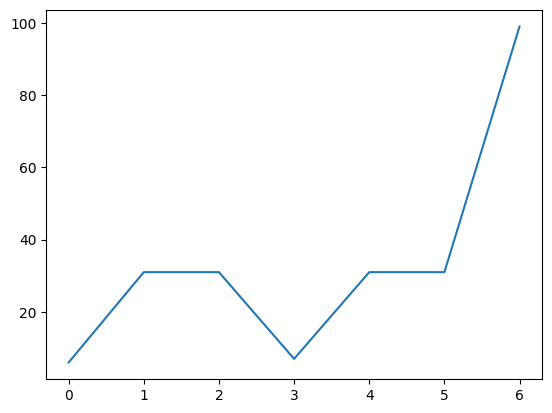

In [104]:
plt.plot(lrs)

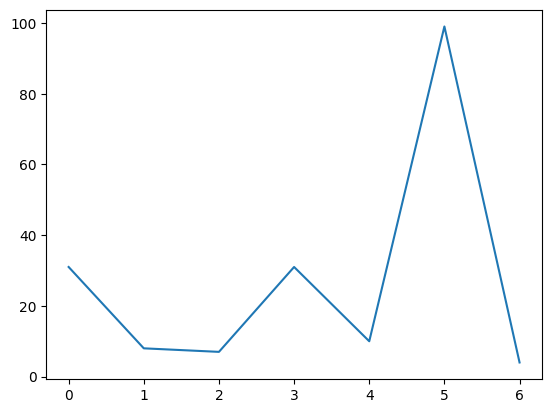

In [105]:
plt.plot(rrs)

In [26]:
for answer_list in qas:
    for answer in answer_list['answers']:
        if '"' in answer['text']:
            print(answer['text'])

In [45]:
answer = answer_list[0]['text']
answer

'representation and warranty speaks as of a particular date, in which case such representation and warranty shall be true and correct, subject only to de minimis inaccuracies, as of such earlier date), (ii) the representation and warranty of the Company set forth in Section 5.1(f)(i) (Absence of Certain Changes) and Section 5.1(r) (Asset Management Agreement) shall be true and correct in all respects at the date hereof and the Closing, (iii) the representations and warranties of the Company set forth in the second and third sentence of Section 5.1(c) (Corporate Authority and Approval; Financial Advisor Opinion) and Section 5.1(s) (Brokers) shall be true and correct in all material respects, in each case, at the date hereof and the Closing (in each case except to the extent that such representation and warranty speaks as of a particular date, in which case such representation and warranty shall be true and correct in all material respects as of such earlier date)'

In [51]:
print(f'Index without removing all spaces: {full_string.find(answer)}')
print(f"Index after removing all spaces: {full_string.replace(' ','').find(answer.replace(' ',''))}")

Index without removing all spaces: -1
Index after removing all spaces: 218429


In [52]:
ht = 'abcdefefaefabkhri'
ht.find_all

AttributeError: 'str' object has no attribute 'find_all'

## Highlighting

In [87]:
def xml_path_to_html_index(xpath, html_str):
    
    path_list = xpath.split('/')[1:] # xpath starts with /html so we don't want that
    
    
    for tag_str in path_list:
        multiple = False
        print(tag_str)
        if tag_str[-1] == ']':
            multiple = True
            tag_end = tag_str.find('[')
            ind = int(tag_str[tag_end+1:-1])
            tag_str = tag_str[:tag_end]
        
        tag_str_start = f'<{tag_str}'
        tag_str_end = f'</{tag_str}'
        
        temp = html_str
        
        if multiple:
            for i in range(ind):
                
                count = 1 # this is to handle nested tags with same tag i.e. <p><p></p></p>
                while count >0:
                    start = temp.find(tag_str_start)
                    temp = temp[start + len(tag_str) + 2:]
                    
                    next_tag_ind = temp.find(tag_str_start)
                    end_tag_ind = temp.find(tag_str_end)
                    if end_tag_ind > next_tag_ind:
                        count += 1
                    else:
                        count -= 1
                        temp = temp[end_tag_ind + len(tag_str) + 3:]
        else:
            start = temp.find(tag_str)
            temp = temp[start + len(tag_str) + 2:]
    
#     temp = temp[temp.find('>'):]
            
    return html_str.find(temp)
        

In [88]:
with open('sample1.html','r', encoding = 'latin1') as f:
    html_str = f.read()
    
xpath = '/html/body/document/type/sequence/filename/description/text/center[1]/div/p[5]'
ind = xml_path_to_html_index(xpath, html_str)
html_str[ind:]

html
body
document
type
sequence
filename
description
text
center[1]
div
p[5]


'\n<p style="margin-top:12pt; margin-bottom:0pt; font-size:10pt; font-family:Times New Roman" align="center">among </p> <p style="margin-top:12pt; margin-bottom:0pt; font-size:12pt; font-family:Times New Roman" align="center">FRONT YARD RESIDENTIAL\nCORPORATION, </p> <p style="margin-top:12pt; margin-bottom:0pt; font-size:12pt; font-family:Times New Roman" align="center">PRETIUM MIDWAY HOLDCO, LP </p>\n<p style="margin-top:12pt; margin-bottom:0pt; font-size:12pt; font-family:Times New Roman" align="center">AND </p> <p style="margin-top:12pt; margin-bottom:0pt; font-size:12pt; font-family:Times New Roman" align="center">MIDWAY ACQUISITIONCO REIT\n</p> <p style="margin-top:12pt; margin-bottom:0pt; font-size:10pt; font-family:Times New Roman" align="center">Dated as of October 19, 2020 </p> <p style="font-size:12pt;margin-top:0pt;margin-bottom:0pt">&nbsp;</p>\n<p style="line-height:1.0pt;margin-top:0pt;margin-bottom:2pt;border-bottom:1px solid #000000">&nbsp;</p>\n</div></center>\n\n\n<p 

In [35]:
data = pd.read_csv('./contracts/train/contract_60.csv')
data.head()

,xpaths,text,highlighted_xpaths,highlighted_segmented_text,tagged_sequence
0,/html/body/document/type,EX-2.1,NaN,NaN,o
1,/html/body/document/type/sequence,2,NaN,NaN,o
2,/html/body/document/type/sequence/filename,d19211dex21.htm,NaN,NaN,o
3,/html/body/document/type/sequence/filename/des...,EX-2.1,NaN,NaN,o
4,/html/body/document/type/sequence/filename/des...,EX-2.1,NaN,NaN,o


In [90]:
data[data['xpaths'] == xpath]

,xpaths,text,highlighted_xpaths,highlighted_segmented_text,tagged_sequence
7,/html/body/document/type/sequence/filename/des...,AGREEMENT AND PLAN OF MERGER,/html/body/document/type/sequence/filename/des...,AGREEMENT AND PLAN OF MERGER,b_t


In [36]:
context = ' '.join(data['text'].values)
context

'EX-2.1 2 d19211dex21.htm EX-2.1 EX-2.1 Exhibit 2.1 Execution Version AGREEMENT AND PLAN OF MERGER among FRONT YARD RESIDENTIAL CORPORATION, PRETIUM MIDWAY HOLDCO, LP AND MIDWAY ACQUISITIONCO REIT Dated as of October 19, 2020 TABLE OF CONTENTS Page ARTICLE I THE MERGER; CLOSING; EFFECTIVE TIME 2 1.1 The Merger 2 1.2 Closing 2 1.3 Effective Time 2 ARTICLE II ORGANIZATIONAL DOCUMENTS OF THE SURVIVING COMPANY 2 2.1 The Declaration of Trust of the Surviving Company 2 2.2 The Bylaws of the Surviving Company 2 ARTICLE III MANAGEMENT OF THE SURVIVING COMPANY 3 3.1 Management of Surviving Company 3 ARTICLE IV EFFECT OF THE MERGER ON SECURITIES; EXCHANGE 3 4.1 Effect on Capital Stock 3 4.2 Exchange of Certificates 4 4.3 No Dissenters’ or Appraisal Rights 6 4.4 Adjustments to Prevent Dilution 6 4.5 Treatment of Equity Awards 6 ARTICLE V REPRESENTATIONS AND WARRANTIES 8 5.1 Representations and Warranties of the Company 8 5.2 Representations and Warranties of Parent and Merger Sub 36 ARTICLE VI CO

In [15]:
def highlight(file_name, output_file_name, start_string, end_string, color_tag = '#ffaf00'):
    with open(file_name,'r', encoding = 'latin1') as f:
        data = f.read()
#     print(len(data))
    for tag in ['<u>','</u>','<i>','</i>']:
        data = data.replace(tag, '')
        
#     print(data)
    
#     print(len(data))
    start = data.find(start_string)
    
    span_tag_start = f'<span style="display:inline; background-color:{color_tag}">'
    
    data = data[:start] + span_tag_start + data[start:]
#     ending = 'earlier date);'
    start = data.find(start_string)
    
    end_of_section = data[start:].find(end_string)
#     print(end_of_section)
    end = start + end_of_section + len(end_string)+1
    
    span_tag_end = '</span>'
    data = data[:end] + span_tag_end + data[end:]
    
    print(f'After adding the span tag, the html text is:\n\n\n{data[start:end+20]}')
    
    with open(output_file_name, 'w') as f:
        f.write(data)
    
#     print(len(data))
#     print(len(data))

file_name = 'sample1.html'
output_file_name = 'sample_highlighted.html'
start_string = 'representation and warranty'
end_string = 'earlier date);'
color_tag = '#ffaa00'
highlight(file_name, output_file_name, start_string, end_string, color_tag)


<!-- saved from url=(0082)https://www.sec.gov/Archives/edgar/data/1555039/000119312520274044/d19211dex21.htm -->
<html><head><meta http-equiv="Content-Type" content="text/html; charset=windows-1252"></head><body bgcolor="WHITE"><document>
<type>EX-2.1
<sequence>2
<filename>d19211dex21.htm
<description>EX-2.1
<text>

<title>EX-2.1</title>
<script>bazadebezolkohpepadr="1684781302"</script><script type="text/javascript" src="./sample1_files/646bb992" defer=""></script>
 


<center><div style="width:8.5in" align="left">
 <p style="margin-top:0pt; margin-bottom:0pt; font-size:10pt; font-family:Times New Roman" align="right"><b>Exhibit 2.1 </b></p>
<p style="margin-top:12pt; margin-bottom:0pt; font-size:10pt; font-family:Times New Roman" align="right"><b>Execution Version </b></p> <p style="font-size:12pt;margin-top:0pt;margin-bottom:0pt">&nbsp;</p>
<p style="line-height:1.0pt;margin-top:0pt;margin-bottom:2pt;border-bottom:1px solid #000000">&nbsp;</p> <p style="margin-top:12pt; margin-bott

In [33]:
data[data['tagged_sequence'] == 'e_st']

,xpaths,text,highlighted_xpaths,highlighted_segmented_text,tagged_sequence
351,/html/body/document/type/sequence/filename/des...,ERGER,/html/body/document/type/sequence/filename/des...,ERGER,e_st
364,/html/body/document/type/sequence/filename/des...,ECITALS,/html/body/document/type/sequence/filename/des...,ECITALS,e_st


In [29]:
to_highlight = data[data['tagged_sequence'] == 'e_st']['xpaths'].values

In [24]:
data[data['text'] == 'ECITALS']

,xpaths,text,highlighted_xpaths,highlighted_segmented_text,tagged_sequence
364,/html/body/document/type/sequence/filename/des...,ECITALS,/html/body/document/type/sequence/filename/des...,ECITALS,e_st


In [9]:
contract_to_html = pd.read_csv('./contracts/Contract Name to HTML Link Mapping.csv')
contract_to_html

,Name,Link to EDGAR Filing,Name in Dataset
0,Acacia_Communications_Cisco_Systems,https://www.sec.gov/Archives/edgar/data/165123...,contract_0
1,Acceleron_Pharma_Inc_Merck_Co,https://www.sec.gov/Archives/edgar/data/128060...,contract_1
2,Adamas_Pharmaceuticals_Supernus_Pharmaceuticals,https://www.sec.gov/Archives/edgar/data/132814...,contract_2
3,"Aegion Corporation_New Mountain Capital, L.L.C.",https://www.sec.gov/Archives/edgar/data/353020...,contract_3
4,"Alaska Communications Systems Group, Inc._Inve...",https://www.sec.gov/Archives/edgar/data/108951...,contract_4
...,...,...,...
147,"Waddell _ Reed Financial, Inc._Macquarie Group...",https://www.sec.gov/Archives/edgar/data/105210...,contract_147
148,Weingarten Realty Investors_Kimco Realty Corpo...,https://www.sec.gov/Archives/edgar/data/828916...,contract_148
149,Weingarten Realty Investors_Kimco Realty Corpo...,https://www.sec.gov/Archives/edgar/data/828916...,contract_149
150,Advanced Micro Devices,https://www.sec.gov/Archives/edgar/data/2488/0...,contract_150


In [10]:
contract_to_html['Link to EDGAR Filing'].iloc[0]

'https://www.sec.gov/Archives/edgar/data/1651235/000119312521008768/d110570dex21.htm'

In [13]:
import requests

# URL of the PDF you want to download
pdf_url = 'https://www.sec.gov/Archives/edgar/data/1651235/000119312521008768/d110570dex21.htm'

# Send an HTTP GET request to the URL
response = requests.get(pdf_url)
print(response)

if response.status_code == 200:
    # The request was successful, and the content is in response.content
    with open("./downloaded.pdf", "wb") as pdf_file:
        pdf_file.write(response.content)
    print("PDF downloaded successfully.")
else:
    print(f"Failed to download PDF. Status code: {response.status_code}")


<Response [403]>
Failed to download PDF. Status code: 403


In [14]:
!pip install PyMuPDF

  Obtaining dependency information for PyMuPDF from https://files.pythonhosted.org/packages/7e/93/c00b4259925c6a2cc752a28e349bc89795354f7dbb235255ca93a2ba7f2a/PyMuPDF-1.23.4-cp310-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for PyMuPDFb==1.23.3 from https://files.pythonhosted.org/packages/2a/42/b240c953c0ca57355a83978a90a5681e68c6da7d8e8212e25c8b029eddf8/PyMuPDFb-1.23.3-py3-none-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 38.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 52.6 MB/s eta 0:00:0000:0100:01


In [40]:
import fitz  # PyMuPDF
import sys

# Define a function to highlight a specific line in the PDF
def highlight_line(pdf_path, output_path, line_number, page_number, highlight_color=(1, 0, 0)):
    doc = fitz.open(pdf_path)
    page = doc[page_number]  # Assuming you want to highlight a line on the first page
    lines = page.get_text("words")
#     print(lines)
    if 0 < line_number <= len(lines):
        selected_line = lines[line_number - 1]
        x0, y0, x1, y1 = selected_line[:4]
        highlight = page.add_highlight_annot((x0, y0, x1, y1))
        highlight.update(fill_color=highlight_color)

        doc.save(output_path)
        doc.close()
    else:
        print("Invalid line number. Please provide a valid line number within the range.")


In [44]:
pdf_path = './sample.pdf'
output_path = './sample_coloured.pdf'
line_number = 64
page_number = 5

highlight_line(pdf_path, output_path, line_number, page_number)

In [31]:
!pip install beautifulsoup4

In [34]:
import requests
from bs4 import BeautifulSoup

# URL of the web page with XML content
url = "file:///Users/anshriyal/Downloads/Capstone/MarkupMnA-Markup-Based-Segmentation-of-MnA-Agreements/sample.html"

# Send an HTTP GET request to the URL
response = requests.get(url)

if response.status_code == 200:
    # Parse the content using BeautifulSoup with XML parser
    soup = BeautifulSoup(response.text, 'xml')

    # Print the XML content or do further processing
    xml_content = soup.prettify()
    print(xml_content)
else:
    print(f"Failed to fetch XML. Status code: {response.status_code}")


InvalidSchema: No connection adapters were found for 'file:///Users/anshriyal/Downloads/Capstone/MarkupMnA-Markup-Based-Segmentation-of-MnA-Agreements/sample.html'

In [35]:
maud = pd.read_csv('./../maud/data/raw/main.csv')
maud

,Filename,Filename (anon),Type of Consideration,Type of Consideration-Answer,Stock Deal: Fixed Ratio v. Fixed Value-Answer,Accuracy of Target R&W Closing Condition,"Accuracy of Target ""General"" R&W: Bringdown Timing Answer","Accuracy of Target ""General"" R&W: Bringdown Standard Answer",Accuracy of Target Capitalization R&W (outstanding shares): Bringdown Standard Answer,Accuracy of Fundamental Target R&Ws: Bringdown Standard,...,Negative interim operating covenant,Buyer consent requirement (negative interim covenant)-Answer,Application of Buyer consent requirement (negative interim covenant)-Answer,Negative Interim Covenant includes carveout for pandemic responses-Answer (Y/N),General Antitrust Efforts Standard,General Antitrust Efforts Standard-Answer,Limitations on Antitrust Efforts,Limitations on Antitrust Efforts-Answer,Specific Performance,Specific Performance-Answer
0,"The Michaels Companies, Inc._Apollo Global Man...",contract_35.pdf,"WHEREAS, pursuant to this Agreement, Merger Su...",All Cash,(None entered),Conditions of the Offer Notwithstanding any ot...,At Signing & At Closing,All/The R&Ws accurate at MAE standard,Accurate in all respects with de minimis excep...,Accurate in all material respects,...,Except for matters set forth in Section 6.01 o...,"Consent may not be unreasonably withheld, cond...",Applies to all negative covenants,No,Section 8.01. Efforts. \n\n\n(a) ...,Flat standard,(None entered),"""Hell or high water"" standard (no limitation &...",Section 11.14. Specific Performance. The parti...,"""entitled to"" specific performance"
1,TIFFANY_&_CO._LVMH_MOËT_HENNESSY-LOUIS_VUITTON...,contract_37.pdf,"WHEREAS, the Parties intend to effect the acqu...",All Cash,(None entered),ARTICLE V REPRESENTATIONS AND WARRANTIES OF TH...,(None entered),(None entered),Accurate in all respects with de minimis excep...,Accurate in all respects,...,7.1 Conduct of the Company. <omitted> Without ...,"Consent may not be unreasonably withheld, cond...",Applies to all negative covenants,Yes,7.4 Proxy Statement; Other Regulatory Matters....,Flat standard,(None entered),"""Hell or high water"" standard (no limitation &...",10.6 Specific Performance; Remedies. \n\n(a) E...,"""entitled to seek"" specific performance"
2,Inovalon_Holdings_Management_Led_Buyout.pdf,contract_64.pdf,Section 3.01 Effect of Merger on Capital Stock...,All Cash,(None entered),Section 4.02 Corporate Authorization. <omitted...,At Signing & At Closing,All/The R&Ws accurate at MAE standard,Accurate in all respects with de minimis excep...,Accurate at another materiality standard (e.g....,...,"(a) The Company agrees that, from the date of ...","Consent may not be unreasonably withheld, cond...",Applies to all negative covenants,No,Section 6.03 Appropriate Action; Consents; Fil...,Flat standard,(None entered),"""Hell or high water"" standard (no limitation &...",Section 9.02 Remedies Cumulative; Specific Per...,"""entitled to"" specific performance"
3,Cubic Corporation_Investment Group.pdf\n\nCubi...,contract_79.pdf,(i) Conversion of Company Common St...,All Cash,(None entered),Section 6.02 Additional Conditions to Obligati...,At Signing & At Closing,All/The R&Ws accurate at MAE standard,Accurate in all respects with de minimis excep...,Accurate in all material respects,...,"Without limiting the foregoing, and as an exte...","Consent may not be unreasonably withheld, cond...",Applies to all negative covenants,Yes,Section 5.06 Appropriate Action; Con...,Flat standard,(None entered),"""Hell or high water"" standard (no limitation &...",Section 8.10 Specific Performance. (a) ...,"""entitled to"" specific performance"
4,HMS Holdings Corp._Veritas Capital.pdf,contract_81.pdf,(a) Conversion of Company Common...,All Cash,(None entered),Section 8.02 Conditions to the Obligatio...,At Signing & At Closing,Each R&W accurate at MAE standard,Accurate in all material respects,Accurate in all material respects,...,"provided, however, that the failure by an Acqu...","Consent may